In [ ]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'Uploaded file "{filename}" with length {len(uploaded[filename])} bytes')


Saving code.csv to code (2).csv
Uploaded file "code (2).csv" with length 355 bytes


After the file is uploaded, you can load it into a pandas DataFrame using the following code, replacing `'code_analysis.csv'` with the actual filename if it's different:

In [ ]:
import pandas as pd

df = pd.read_csv('code.csv')
display(df.head())

,Experiment_ID,Correctness,Efficiency,Interpretability,Reproducibility,Prompt fidelity,LLM,Prompt
0,EXP_001,5,4,3,2,4,ChatGPT,minimal
1,EXP_002,5,4,4,2,4,ChatGPT,cot
2,EXP_003,5,4,4,2,4,ChatGPT,scot
3,EXP_004,5,4,5,3,4,ChatGPT,role
4,EXP_005,2,2,5,3,2,Claude,minimal


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set consistent style
plt.rcParams.update({
    "font.size": 11,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "legend.frameon": False,
})
criteria = ["Correctness", "Efficiency", "Interpretability",
            "Reproducibility", "Prompt fidelity"]
crit_colors = {
    "Correctness":      "#1b9e77",  # teal
    "Efficiency":       "#d95f02",  # orange
    "Interpretability": "#7570b3",  # purple
    "Reproducibility":  "#e7298a",  # pink
    "Prompt fidelity":  "#66a61e",  # green
}
llm_colors = {
    "ChatGPT": "#4C72B0",  # blue
    "Claude":  "#DD7596",  # soft magenta
}
prompt_order = ["minimal", "cot", "scot", "role"]



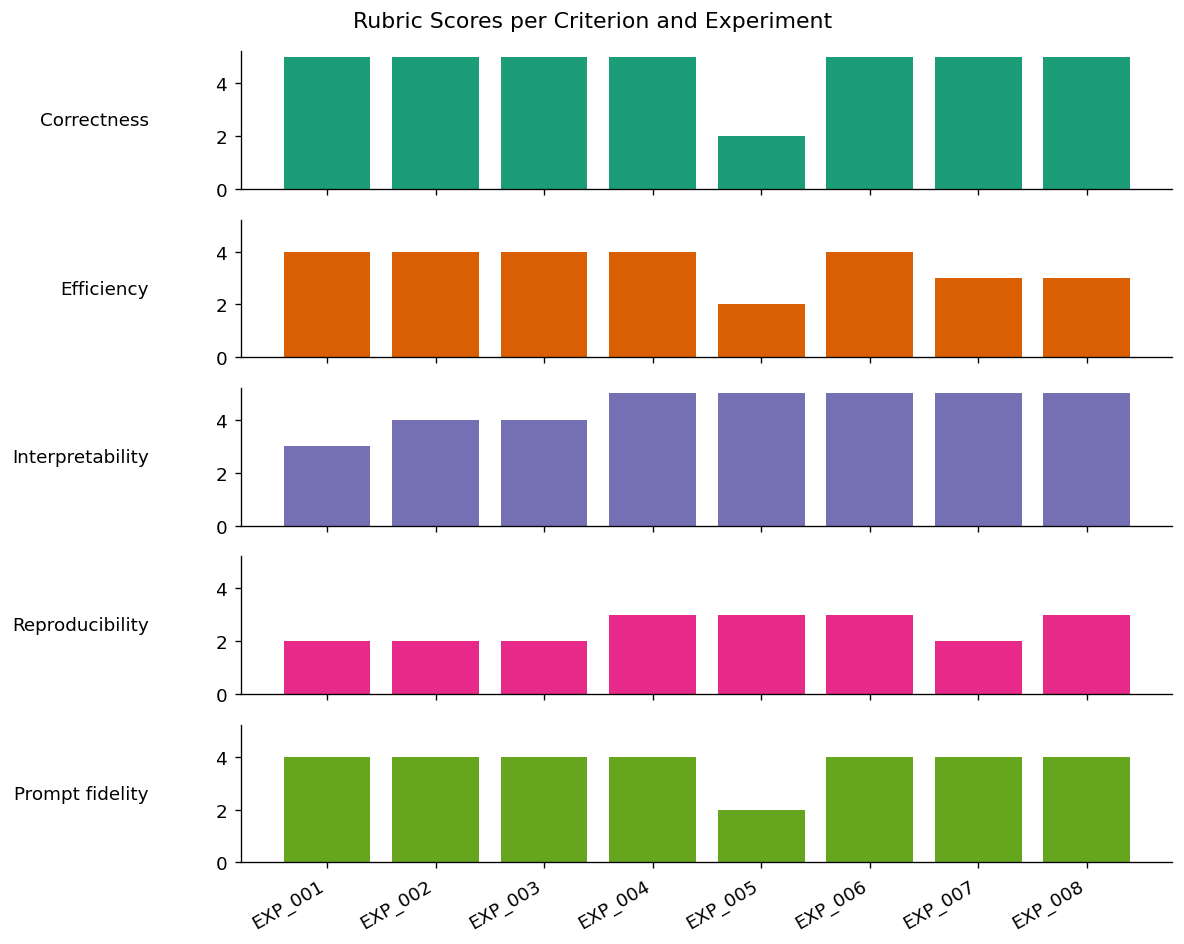

In [ ]:

fig, axes = plt.subplots(len(criteria), 1, figsize=(10, 8), sharex=True)

x = np.arange(len(df["Experiment_ID"]))
exp_ids = df["Experiment_ID"].tolist()

for ax, crit in zip(axes, criteria):
    ax.bar(x, df[crit], color=crit_colors[crit])
    ax.set_ylabel(crit, rotation=0, labelpad=40, ha="right", va="center")
    ax.set_ylim(0, 5.2)

axes[-1].set_xticks(x)
axes[-1].set_xticklabels(exp_ids, rotation=30, ha="right")
fig.suptitle("Rubric Scores per Criterion and Experiment", y=0.98)

plt.tight_layout()
plt.show()



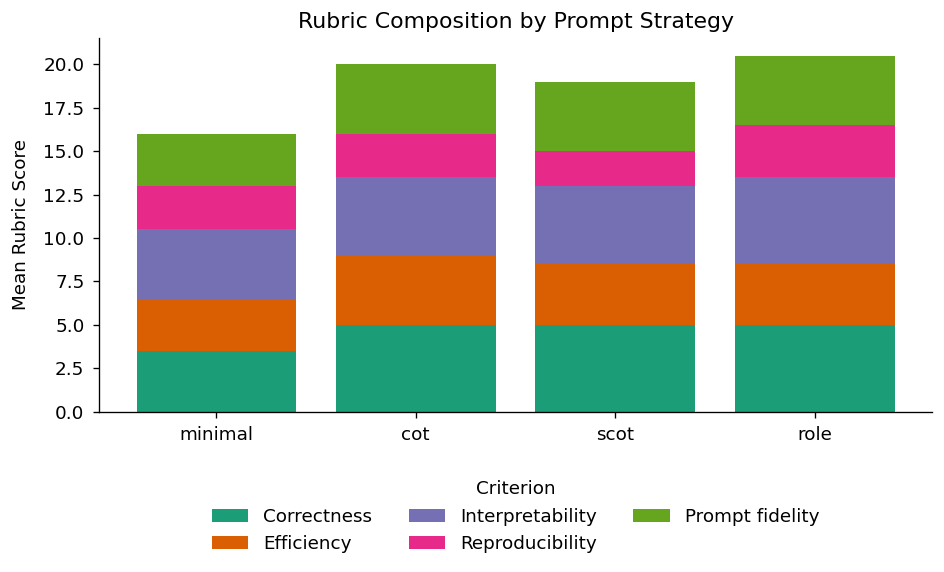

In [ ]:
df_prompt = df.groupby("Prompt")[criteria].mean().reindex(prompt_order)

fig, ax = plt.subplots(figsize=(8, 5))

bottom = np.zeros(len(df_prompt))
for crit in criteria:
    ax.bar(df_prompt.index, df_prompt[crit], bottom=bottom,
           color=crit_colors[crit], label=crit)
    bottom += df_prompt[crit].values

ax.set_ylabel("Mean Rubric Score")
ax.set_title("Rubric Composition by Prompt Strategy")

ax.legend(title="Criterion", ncol=3,
          bbox_to_anchor=(0.5, -0.14), loc="upper center")

plt.tight_layout()
plt.show()



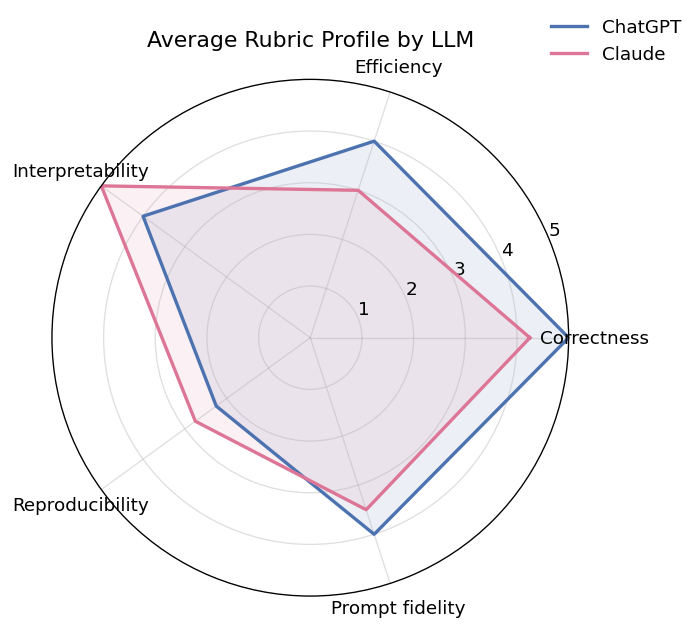

In [ ]:
means_llm = df.groupby("LLM")[criteria].mean()

labels = criteria
num_vars = len(labels)

angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
angles_closed = np.concatenate([angles, angles[:1]])  # close loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for llm in means_llm.index:
    vals = means_llm.loc[llm].tolist()
    vals.append(vals[0])
    ax.plot(angles_closed, vals, linewidth=2,
            color=llm_colors[llm], label=llm)
    ax.fill(angles_closed, vals, alpha=0.10, color=llm_colors[llm])

# radial ticks
ax.set_ylim(0, 5)
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(["1", "2", "3", "4", "5"])

# remove default xtick labels and add our own slightly outside the grid
ax.set_xticks(angles)
ax.set_xticklabels([])
label_radius = 5.5
for angle, label in zip(angles, labels):
    ax.text(angle, label_radius, label,
            ha="center", va="center", fontsize=11)

ax.set_title("Average Rubric Profile by LLM", pad=20)
ax.grid(alpha=0.4)
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.15))

plt.tight_layout()
plt.show()




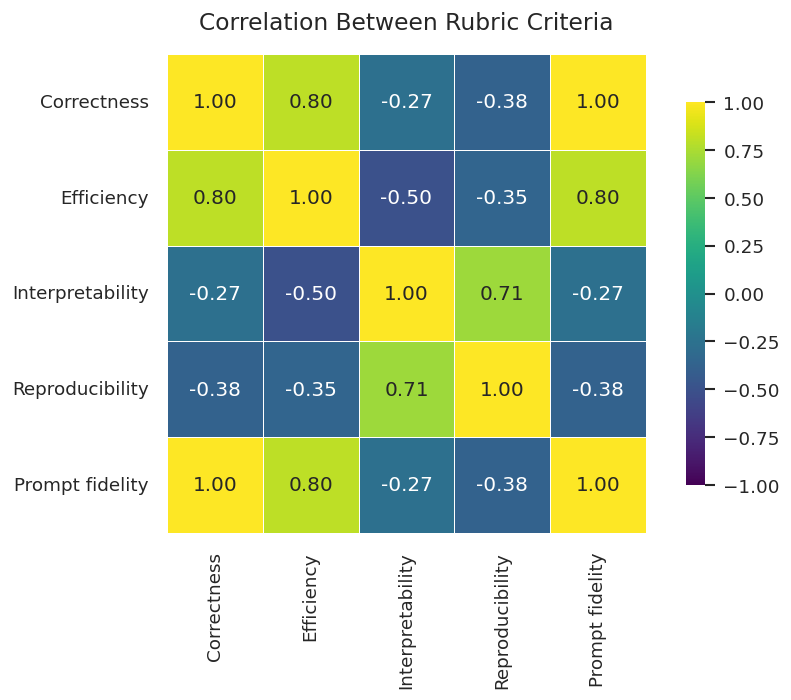

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select rubric columns
rubric_df = df[["Correctness", "Efficiency", "Interpretability",
                "Reproducibility", "Prompt fidelity"]]

# Compute correlation
corr = rubric_df.corr()

# Plot
plt.figure(figsize=(8, 6))
sns.set(style="white")

ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="viridis",   # colour-blind-friendly sequential palette
    vmin=-1, vmax=1,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Between Rubric Criteria", fontsize=14, pad=15)
plt.tight_layout()
plt.show()
